**CAMPUS PLACEMENT ANALYSIS** 

Based on the Analysis I predicted few things which I have mentioned at the end of the code 

I did this project using the Kaggle dataset Placement_Data_Full_Class dataset

In [1]:
from google.colab import files
upload=files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [4]:
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [5]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
df['salary'].fillna(0,inplace = True)

In [10]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [11]:
df_gender_analysis =  df[['gender','status']].groupby(['gender'], as_index = False).count()
df_gender_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['gender'],as_index = False).count()
df_gender_analysis['Placed'] = df_gender_analysis1['status']
df_gender_analysis['Placed_Percent'] = df_gender_analysis['Placed']/df_gender_analysis['status']*100
df_gender_analysis.rename(columns = {'gender':'Gender' , 'status':'Total_Students'})

,Gender,Total_Students,Placed,Placed_Percent
0,F,76,48,63.157895
1,M,139,100,71.942446


In [12]:
df_gender_analysis2 = df[['gender','salary']].groupby(['gender'],as_index = False).mean()
df_gender_analysis2

,gender,salary
0,F,168815.789474
1,M,215043.165468


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


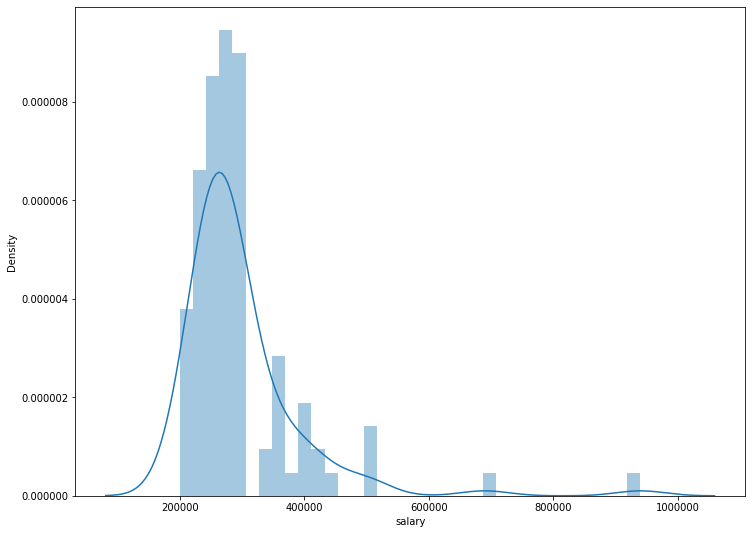

In [13]:
plt.figure(figsize=(12,9))
df_male = df.loc[df['gender'] == 'M']
ax = sns.distplot(df_male['salary'].loc[df['salary']!=0])
ax.ticklabel_format(style = 'plain')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


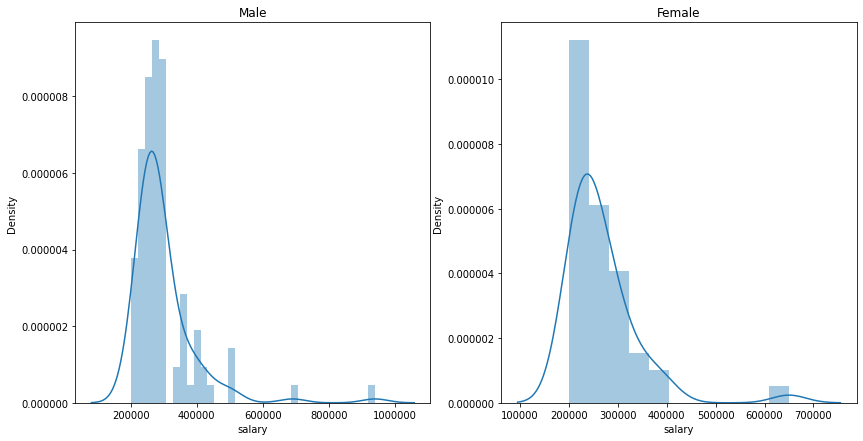

In [14]:
fig, ax =plt.subplots(1,2 , figsize = (14,7))
df_male = df.loc[df['gender'] == 'M']
df_female = df.loc[df['gender'] == 'F']
sns.distplot(df_male['salary'].loc[df['salary']!=0] , ax = ax[0])
sns.distplot(df_female['salary'].loc[df['salary']!=0] , ax = ax[1])
ax[0].ticklabel_format(style = 'plain')
ax[1].ticklabel_format(style = 'plain')
ax[0].set_title("Male")
ax[1].set_title("Female")
plt.show()

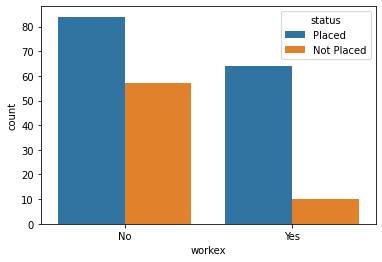

In [15]:
sns.countplot(x = 'workex' , data =df , hue = 'status')

In [16]:
df[['workex','salary']].groupby(['workex']).mean()

,salary
workex,
No,165333.333333
Yes,262283.783784


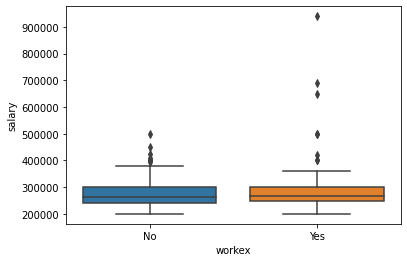

In [17]:
sns.boxplot(x = 'workex' , y = 'salary' , data=df.loc[df['status'] == 'Placed'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


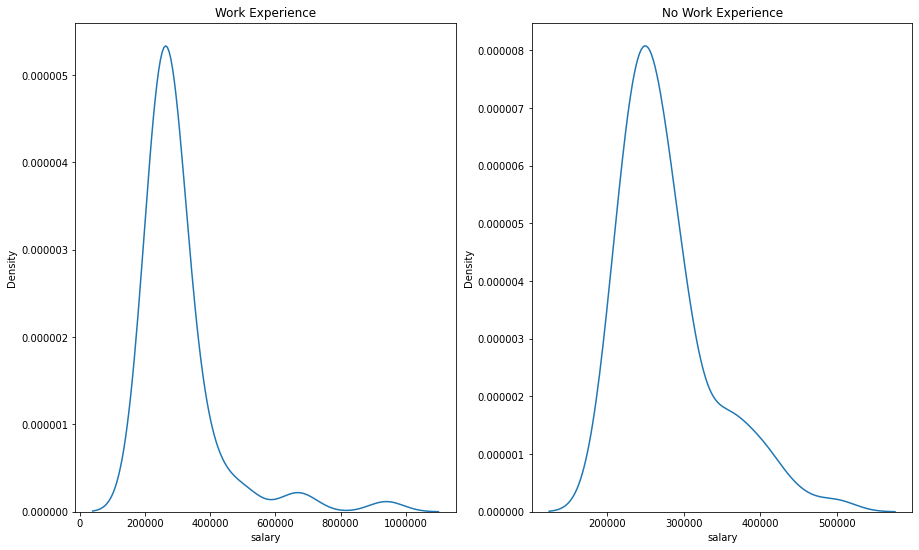

In [18]:
figure , ax = plt.subplots(1,2 , figsize = (15,9))
df1 = df.loc[df['status'] == 'Placed']
sns.distplot(df1.loc[df['workex'] == 'Yes']['salary'] ,hist = False,ax = ax[0])
ax[0].set_title("Work Experience")
sns.distplot(df1.loc[df['workex'] == 'No']['salary']  , hist = False , ax = ax[1])
ax[1].set_title("No Work Experience")
ax[0].ticklabel_format(style = 'plain')
ax[1].ticklabel_format(style = 'plain')

In [19]:
df_boards_analysis =  df[['ssc_b','status']].groupby(['ssc_b'], as_index = False).count()
df_boards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['ssc_b'],as_index = False).count()
df_boards_analysis['Placed'] = df_boards_analysis1['status']
df_boards_analysis['Placed_Percent'] = df_boards_analysis['Placed']/df_boards_analysis['status']*100
df_boards_analysis.rename(columns = {'ssc_b':'SSC_Board' , 'status':'Total_Students'})

,SSC_Board,Total_Students,Placed,Placed_Percent
0,Central,116,78,67.241379
1,Others,99,70,70.707071


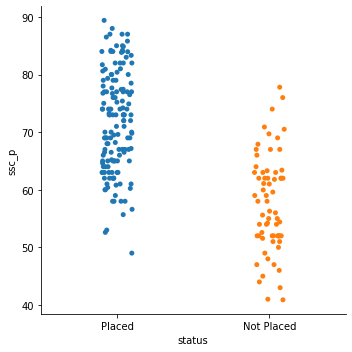

In [20]:
sns.catplot(x = 'status' , y = 'ssc_p' , data = df )

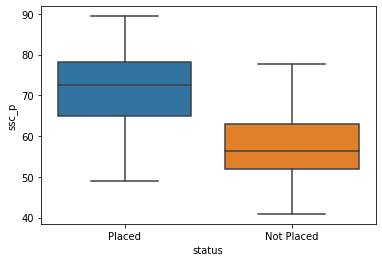

In [21]:
sns.boxplot(x = 'status' , y = 'ssc_p' , data = df )

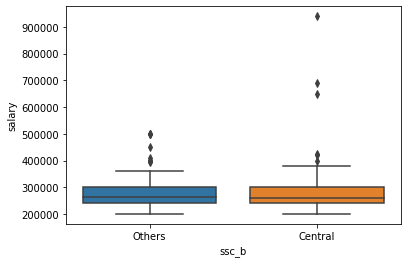

In [22]:
sns.boxplot(x = 'ssc_b' , y = 'salary' , data = df.loc[df['status']=='Placed'])

In [23]:
df_hscboards_analysis =  df[['hsc_b','status']].groupby(['hsc_b'], as_index = False).count()
df_hscboards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['hsc_b'],as_index = False).count()
df_hscboards_analysis['Placed'] = df_hscboards_analysis1['status']
df_hscboards_analysis['Placed_Percent'] = df_hscboards_analysis['Placed']/df_hscboards_analysis['status']*100
df_hscboards_analysis.rename(columns = {'hsc_b':'HSC_Board' , 'status':'Total_Students'})

,HSC_Board,Total_Students,Placed,Placed_Percent
0,Central,84,57,67.857143
1,Others,131,91,69.465649


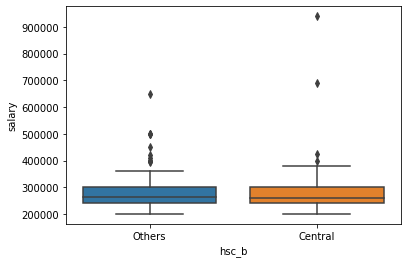

In [24]:
sns.boxplot(x = 'hsc_b' , y = 'salary' , data = df.loc[df['status']== 'Placed'] )

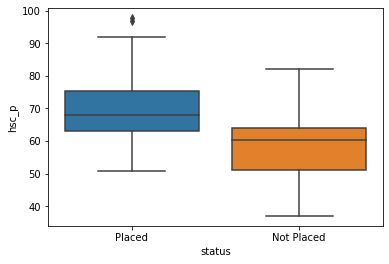

In [25]:
sns.boxplot(x = 'status' , y = 'hsc_p' , data = df )

In [26]:
df_hscsubject_analysis =  df[['hsc_s','status']].groupby(['hsc_s'], as_index = False).count()
df_hscsubject_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['hsc_s'],as_index = False).count()
df_hscsubject_analysis['Placed'] = df_hscsubject_analysis1['status']
df_hscsubject_analysis['Placed_Percent'] = df_hscsubject_analysis['Placed']/df_hscsubject_analysis['status']*100
df_hscsubject_analysis.rename(columns = {'hsc_s':'HSC_subject' , 'status':'Total_Students'})

,HSC_subject,Total_Students,Placed,Placed_Percent
0,Arts,11,6,54.545455
1,Commerce,113,79,69.911504
2,Science,91,63,69.230769


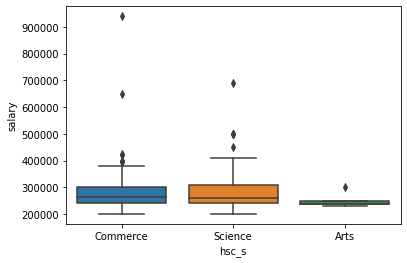

In [27]:
sns.boxplot(x = 'hsc_s' , y = 'salary' , data = df.loc[df['status']== 'Placed'] )

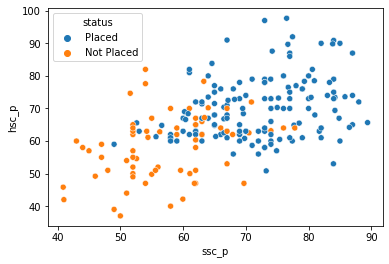

In [28]:
sns.scatterplot(x = 'ssc_p', y = 'hsc_p' , data =df , hue = 'status')

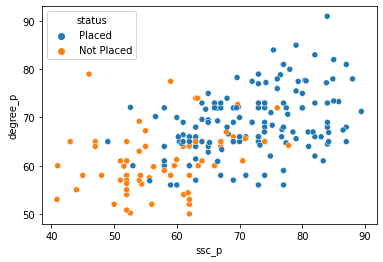

In [29]:
sns.scatterplot(x = 'ssc_p', y = 'degree_p' , data =df , hue = 'status')

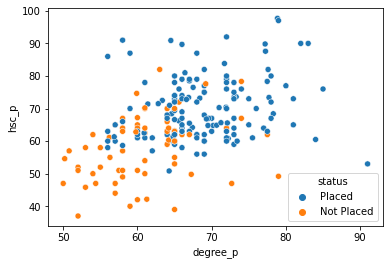

In [30]:
sns.scatterplot(x = 'degree_p', y = 'hsc_p' , data =df , hue = 'status')

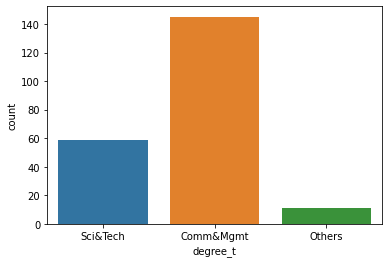

In [31]:
sns.countplot(x='degree_t' , data =df )

In [32]:
df_degree_analysis =  df[['degree_t','status']].groupby(['degree_t'], as_index = False).count()
df_degree_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['degree_t'],as_index = False).count()
df_degree_analysis['Placed'] = df_degree_analysis1['status']
df_degree_analysis['Placed_Percent'] = df_degree_analysis['Placed']/df_degree_analysis['status']*100
df_degree_analysis.rename(columns = {'degree_t':'Degree_Stream' , 'status':'Total_Students'})

,Degree_Stream,Total_Students,Placed,Placed_Percent
0,Comm&Mgmt,145,102,70.344828
1,Others,11,5,45.454545
2,Sci&Tech,59,41,69.491525


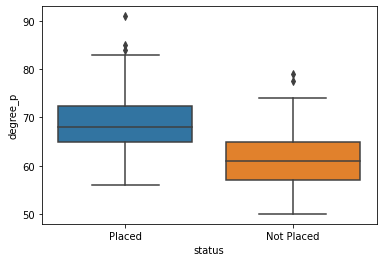

In [33]:
sns.boxplot(x = 'status' , y = 'degree_p' , data = df )

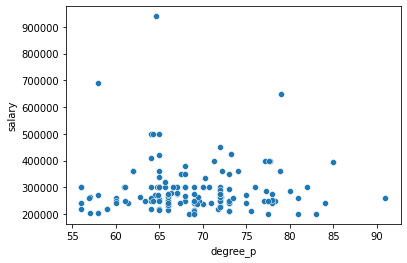

In [34]:
sns.scatterplot(x = 'degree_p' , y= 'salary' , data = df.loc[df['salary'] != 0])

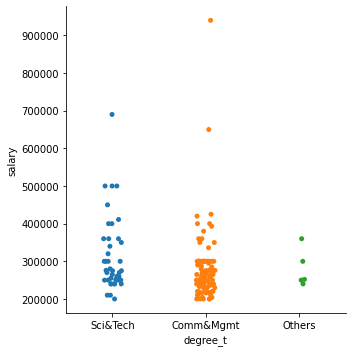

In [35]:
sns.catplot(x = 'degree_t' , y = 'salary' , data = df.loc[df['salary'] != 0])

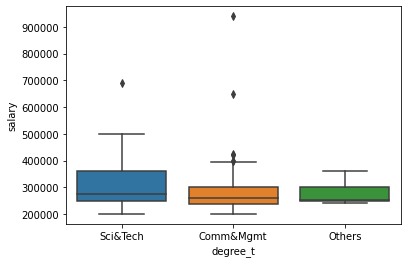

In [36]:
sns.boxplot(x = 'degree_t' , y = 'salary' , data = df.loc[df['salary'] != 0])

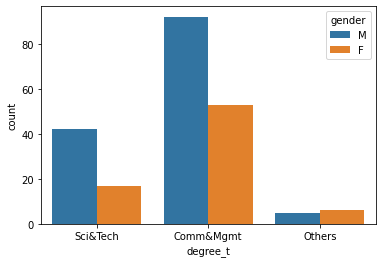

In [37]:
sns.countplot(x = 'degree_t' , data =df , hue = 'gender')

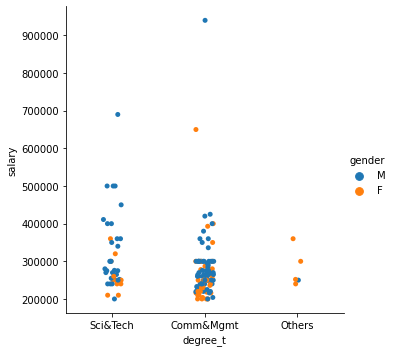

In [38]:
sns.catplot(x = 'degree_t' , y = 'salary' , data =df.loc[df['status']== 'Placed'] , hue = 'gender')

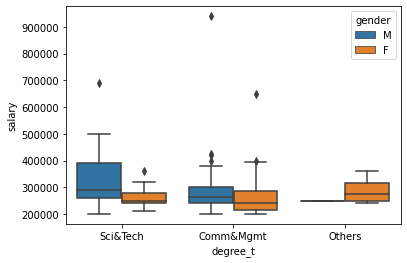

In [39]:
sns.boxplot(x = 'degree_t' , y = 'salary', hue='gender' , data = df.loc[df['salary'] != 0])

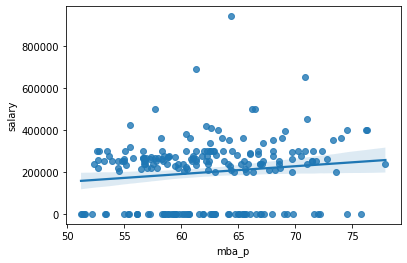

In [40]:
sns.regplot(x = 'mba_p', y = 'salary' , data = df)

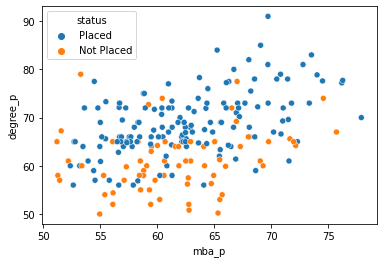

In [41]:
sns.scatterplot(x = 'mba_p' , y = 'degree_p' , data = df , hue = 'status' )

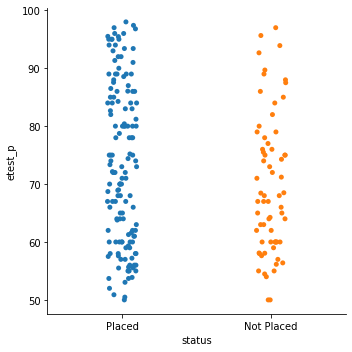

In [42]:
sns.catplot(x = 'status' , y = 'etest_p' , data = df )

In [43]:
df[['status','etest_p']].groupby('status').mean()

,etest_p
status,
Not Placed,69.587910
Placed,73.238041


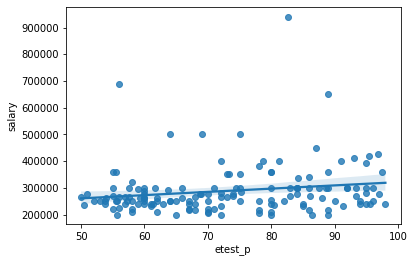

In [44]:
sns.regplot(x = 'etest_p' , y = 'salary' , data = df.loc[df['salary'] != 0])

In [45]:
df_specialisation_analysis =  df[['specialisation','status']].groupby(['specialisation'], as_index = False).count()
df_specialisation_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['specialisation'],as_index = False).count()
df_specialisation_analysis['Placed'] = df_specialisation_analysis1['status']
df_specialisation_analysis['Placed_Percent'] = df_specialisation_analysis['Placed']/df_specialisation_analysis['status']*100
df_specialisation_analysis.rename(columns = {'specialisation':'MBA_specialisation' , 'status':'Total_Students'})

,MBA_specialisation,Total_Students,Placed,Placed_Percent
0,Mkt&Fin,120,95,79.166667
1,Mkt&HR,95,53,55.789474


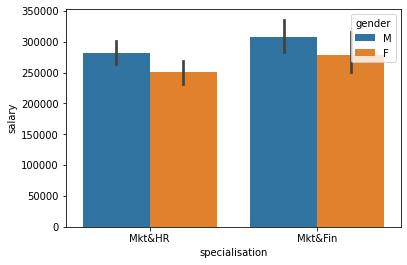

In [46]:
sns.barplot(x = 'specialisation' , y = 'salary' , data =df.loc[df['status']== 'Placed'] , hue = 'gender')

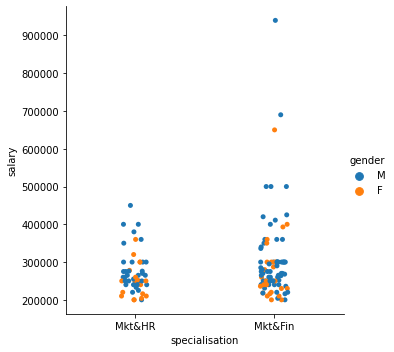

In [47]:
sns.catplot(x = 'specialisation' , y = 'salary' , data =df.loc[df['status']== 'Placed'] , hue = 'gender')

In [48]:
df = pd.get_dummies(df,columns = ['status'])
df = pd.get_dummies(df,columns = ['specialisation'])
df = pd.get_dummies(df,columns = ['gender'])
#df['status'] = le.fit_transform(df['status'])

In [49]:
df.rename(columns = {'status_Not Placed':'Not Placed' , 'status_Placed':'Placed' ,
                    'specialisation_Mkt&Fin':'Marketting and Finance' , 'specialisation_Mkt&HR':'Marketting and HR',
                    'gender_F':'Female' , 'gender_M':'Male'}, inplace =True)

In [50]:
df.corrwith(df['Placed'])

sl_no                    -0.026859
ssc_p                     0.607889
hsc_p                     0.491228
degree_p                  0.479861
etest_p                   0.127639
mba_p                     0.076922
salary                    0.865774
Not Placed               -1.000000
Placed                    1.000000
Marketting and Finance    0.250655
Marketting and HR        -0.250655
Female                   -0.090670
Male                      0.090670
dtype: float64

SSC_percentage matters the most for getting a placement as it is highly correlated with Placement.

As we can see from above analysis , the factors affecting placement are : MBA specialisation, Degree Stream, HSC_subject, Work Experience, Degree percentage, ssc percentage ,Gender and hsc percentage

As per this dataset Males got more placement and higher salaries than females.

MBA Specialization: Finance Department has higher placements and higher salaries

Work Experience : People having workexperience are more likely of getting placed with higer salaries.

Degree Percentage : Having more percentage can increase chances of placement but won't impact salary much

Degree Stream : Science and commerce students get placed more as compared to arts .Salaries are higher for science than other streams.
Having Higher HSC and SSC percentage can increase your chances of getting placed although boards don't play an important role in getting a placement
Males are getting more placements and higher salaries than females.
Percentage matters for getting a placement.SSC percentage has greatest influence on placement

